<a href="https://colab.research.google.com/github/showmeinfinity/final_project/blob/main/Step_4_Error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install better-profanity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from better_profanity import profanity

In [ ]:
# Load datasets
correctly_classified_df = pd.read_csv('majority_combined_community_correctly_classified_instances.csv')
incorrectly_classified_df = pd.read_csv('majority_combined_community_incorrectly_classified_instances.csv')

In [ ]:
correctly_classified_df.head()

,instance_id,offensiveness,cleaned_text,cleaned_domain,text_with_domain,predicted_label,true_label,cross_entropy
0,4,0,stay away from children.,elections2020,elections2020 stay away from children.,0,0,0.051629
1,6,0,trayvon martin #georgezimmerman deserved the d...,blm,blm trayvon martin #georgezimmerman deserved t...,0,0,0.140492
2,9,0,well kind of all over the news. and i do not k...,blm,blm well kind of all over the news. and i do n...,0,0,0.096998
3,10,0,"""you do not want a family christmas if it mean...",covid-19,"covid-19 ""you do not want a family christmas i...",0,0,0.159791
4,12,0,"watch for free, ""america street,"" on racism an...",blm,"blm watch for free, ""america street,"" on racis...",0,0,0.031213


In [ ]:
incorrectly_classified_df.head()

,instance_id,offensiveness,cleaned_text,cleaned_domain,text_with_domain,predicted_label,true_label,cross_entropy
0,5,1,no super-spreader accusations as people party ...,covid-19,covid-19 no super-spreader accusations as peop...,0,1,0.829659
1,7,1,trump is in favor of what happened in texas ag...,elections2020,elections2020 trump is in favor of what happen...,0,1,1.144231
2,14,1,"gee. thanks, dick.",covid-19,"covid-19 gee. thanks, dick.",0,1,2.449605
3,15,1,"come on man. listen jack , okay here is the de...",elections2020,"elections2020 come on man. listen jack , okay ...",0,1,1.376518
4,28,1,reality. super! #blacklivesmatter is a racist ...,blm,blm reality. super! #blacklivesmatter is a rac...,0,1,1.301749


Text(0.5, 1.0, 'Domain Frequencies Comparison')

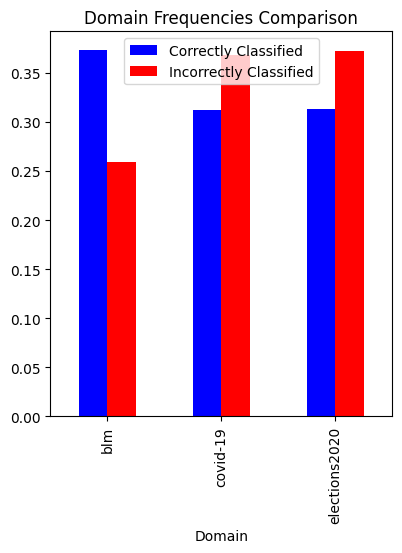

In [ ]:
# Comparison of Domain Frequencies

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
domains_correct = correctly_classified_df['cleaned_domain'].value_counts(normalize=True)
domains_incorrect = incorrectly_classified_df['cleaned_domain'].value_counts(normalize=True)
domains = set(domains_correct.index) | set(domains_incorrect.index)
correct_values = [domains_correct.get(domain, 0) for domain in domains]
incorrect_values = [domains_incorrect.get(domain, 0) for domain in domains]
df_domains = pd.DataFrame({'Domain': list(domains), 'Correctly Classified': correct_values, 'Incorrectly Classified': incorrect_values})
df_domains.set_index('Domain').plot(kind='bar', ax=plt.gca(), color=["blue", "red"])
plt.title('Domain Frequencies Comparison')

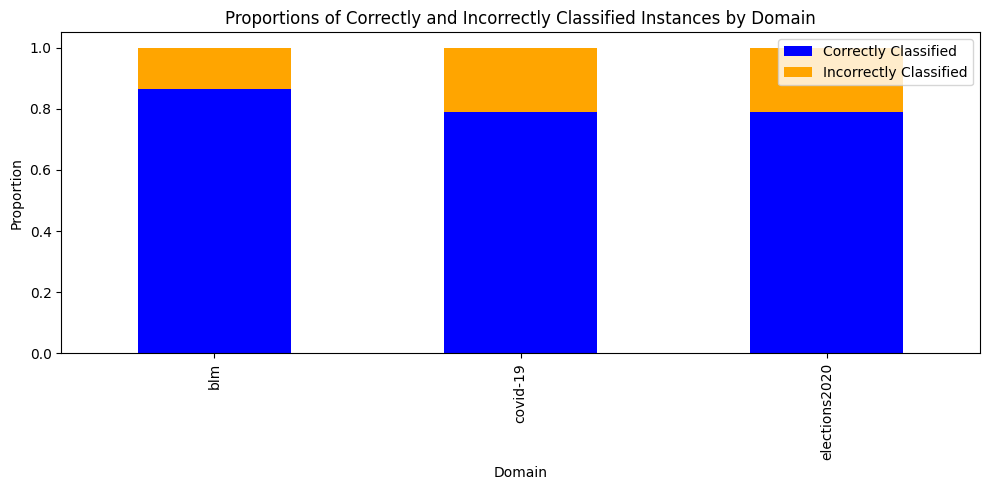

In [ ]:
# Calculate the counts for each domain
correct_domain_counts = correctly_classified_df['cleaned_domain'].value_counts()
incorrect_domain_counts = incorrectly_classified_df['cleaned_domain'].value_counts()
all_domains = set(correct_domain_counts.index) | set(incorrect_domain_counts.index)

correct_counts = [correct_domain_counts.get(domain, 0) for domain in all_domains]
incorrect_counts = [incorrect_domain_counts.get(domain, 0) for domain in all_domains]

# Convert counts to proportions
total_counts = [c + ic for c, ic in zip(correct_counts, incorrect_counts)]
correct_proportions = [c / tc for c, tc in zip(correct_counts, total_counts)]
incorrect_proportions = [ic / tc for ic, tc in zip(incorrect_counts, total_counts)]


# Create a DataFrame for plotting
df_domains = pd.DataFrame({
    'Domain': list(all_domains),
    'Correctly Classified': correct_proportions,
    'Incorrectly Classified': incorrect_proportions
})

# Plot the 100% stacked bar chart
ax = df_domains.set_index('Domain').plot(kind='bar', stacked=True, figsize=(10, 5), color=["blue", "orange"])
ax.set_ylabel('Proportion')
ax.set_title('Proportions of Correctly and Incorrectly Classified Instances by Domain')
plt.tight_layout()
plt.show()

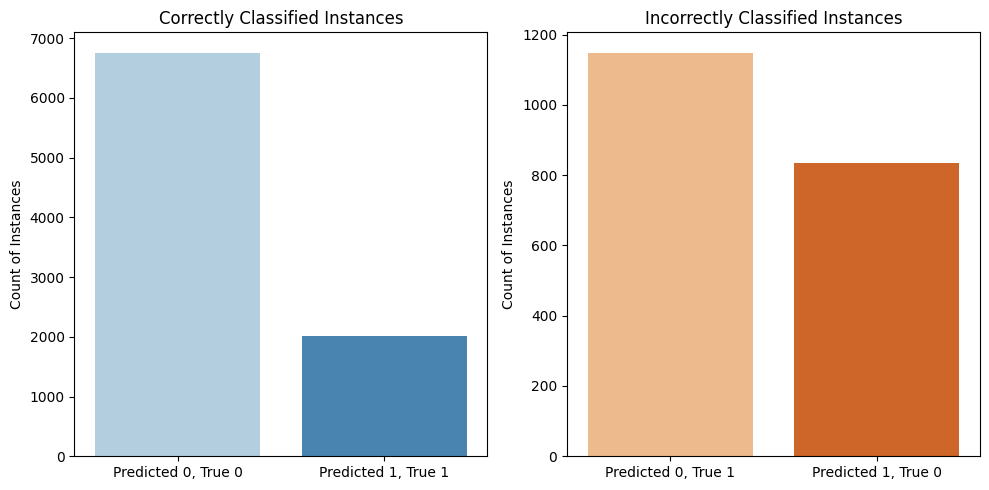

In [ ]:
# For Correctly Classified Instances
correct_0 = correctly_classified_df[correctly_classified_df['predicted_label'] == 0].shape[0]
correct_1 = correctly_classified_df[correctly_classified_df['predicted_label'] == 1].shape[0]

# For Incorrectly Classified Instances
incorrect_0_1 = incorrectly_classified_df[(incorrectly_classified_df['predicted_label'] == 0) & (incorrectly_classified_df['true_label'] == 1)].shape[0]
incorrect_1_0 = incorrectly_classified_df[(incorrectly_classified_df['predicted_label'] == 1) & (incorrectly_classified_df['true_label'] == 0)].shape[0]

plt.figure(figsize=(10, 5))

# Correctly classified bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=['Predicted 0, True 0', 'Predicted 1, True 1'], y=[correct_0, correct_1], palette="Blues")
plt.title('Correctly Classified Instances')
plt.ylabel('Count of Instances')

# Incorrectly classified bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=['Predicted 0, True 1', 'Predicted 1, True 0'], y=[incorrect_0_1, incorrect_1_0], palette="Oranges")
plt.title('Incorrectly Classified Instances')
plt.ylabel('Count of Instances')

plt.tight_layout()
plt.show()


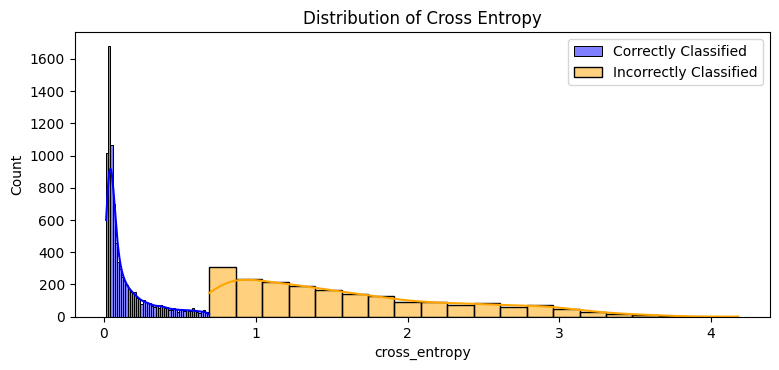

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Distribution of cross_entropy
plt.subplot(3, 2, 3)
sns.histplot(correctly_classified_df['cross_entropy'], kde=True, color="blue", label="Correctly Classified")
sns.histplot(incorrectly_classified_df['cross_entropy'], kde=True, color="orange", label="Incorrectly Classified")
plt.title("Distribution of Cross Entropy")
plt.legend()

plt.tight_layout()
plt.show()

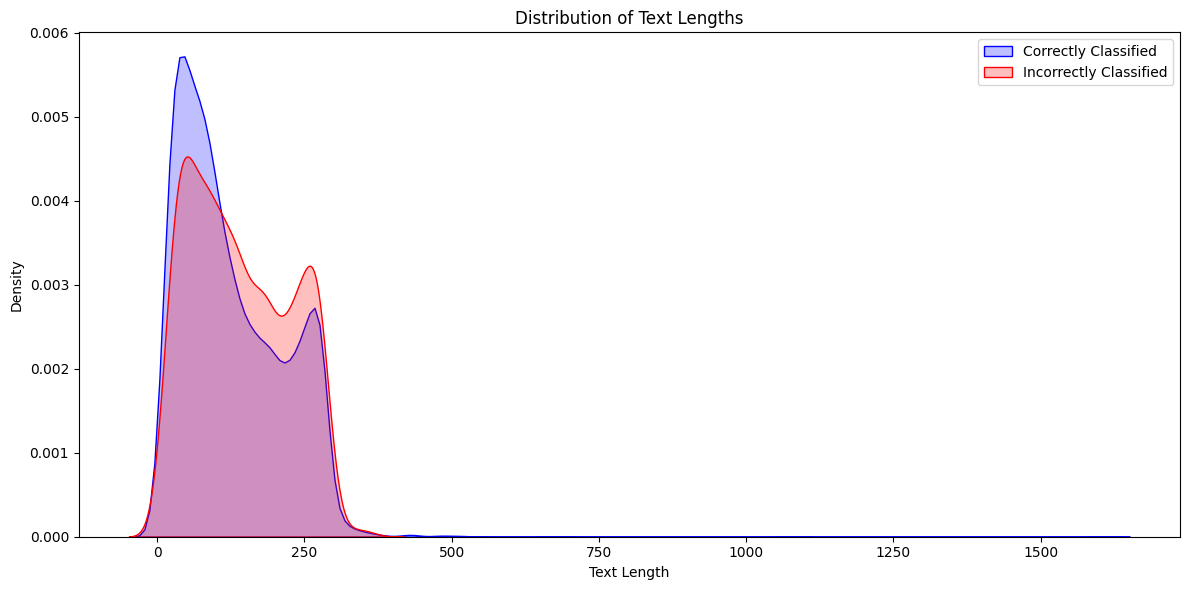

In [ ]:
# Add a new column for text length
correctly_classified_df['text_length'] = correctly_classified_df['cleaned_text'].apply(len)
incorrectly_classified_df['text_length'] = incorrectly_classified_df['cleaned_text'].apply(len)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Distribution of text lengths
sns.kdeplot(correctly_classified_df['text_length'], color="blue", label="Correctly Classified", fill=True)
sns.kdeplot(incorrectly_classified_df['text_length'], color="red", label="Incorrectly Classified", fill=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


Look at phrases

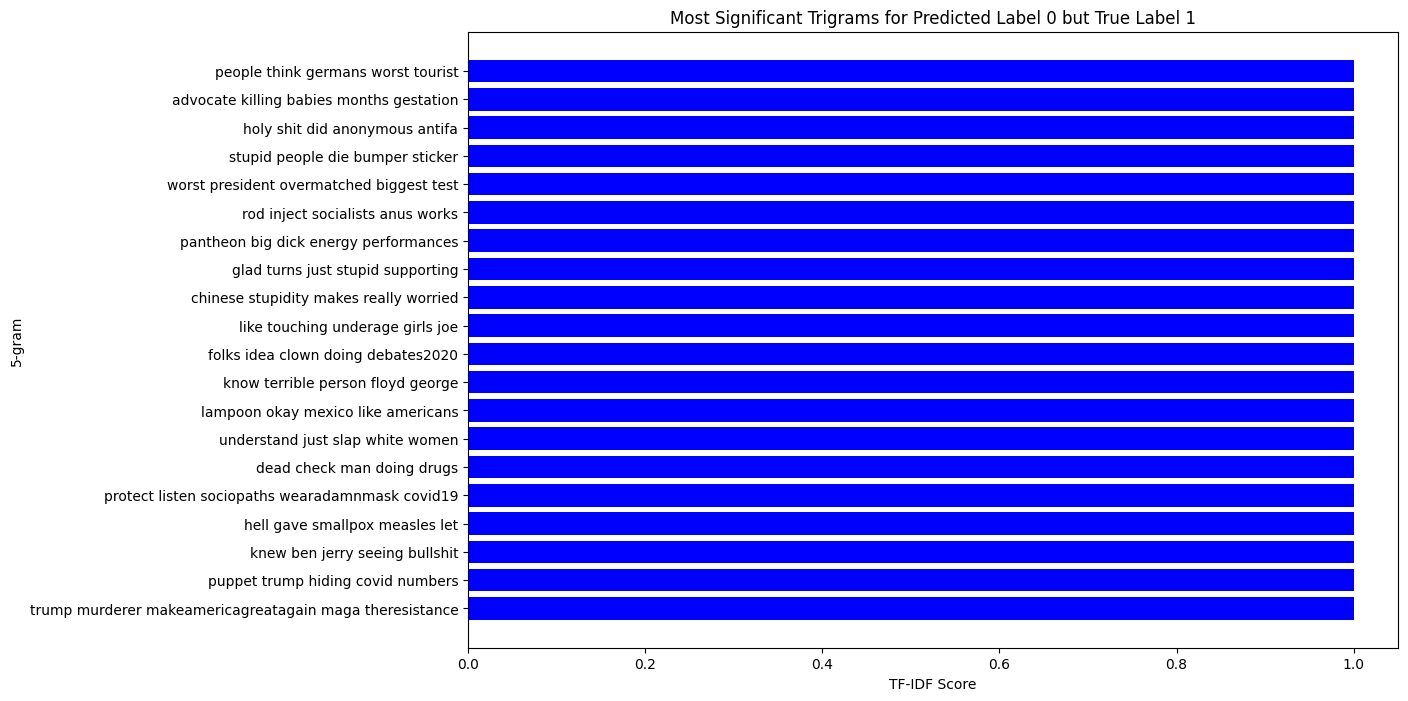

people think germans worst tourist: 1.0000
advocate killing babies months gestation: 1.0000
holy shit did anonymous antifa: 1.0000
stupid people die bumper sticker: 1.0000
worst president overmatched biggest test: 1.0000
rod inject socialists anus works: 1.0000
pantheon big dick energy performances: 1.0000
glad turns just stupid supporting: 1.0000
chinese stupidity makes really worried: 1.0000
like touching underage girls joe: 1.0000
folks idea clown doing debates2020: 1.0000
know terrible person floyd george: 1.0000
lampoon okay mexico like americans: 1.0000
understand just slap white women: 1.0000
dead check man doing drugs: 1.0000
protect listen sociopaths wearadamnmask covid19: 1.0000
hell gave smallpox measles let: 1.0000
knew ben jerry seeing bullshit: 1.0000
puppet trump hiding covid numbers: 1.0000
trump murderer makeamericagreatagain maga theresistance: 1.0000


In [ ]:
# Filter out instances where predicted label is 0 and true label is 1
filtered_df = incorrectly_classified_df[(incorrectly_classified_df['predicted_label'] == 0) & (incorrectly_classified_df['true_label'] == 1)]

# Initialise the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(5, 5))

# Fit and transform the filtered data
tfidf_matrix = vectorizer.fit_transform(filtered_df['cleaned_text'])

# Sum the TF-IDF scores for each trigram across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)
tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]

# Plotting the most significant trigrams
plt.figure(figsize=(12, 8))
words, scores = zip(*sorted_tfidf_scores)
plt.barh(words, scores, color="blue")
plt.xlabel('TF-IDF Score')
plt.ylabel('5-gram')
plt.title('5-gram examples for Predicted Label 0 but True Label 1')
plt.gca().invert_yaxis()
plt.show()

# Print the most significant 5-grams and their scores
for word, score in sorted_tfidf_scores:
    print(f"{word}: {score:.4f}")

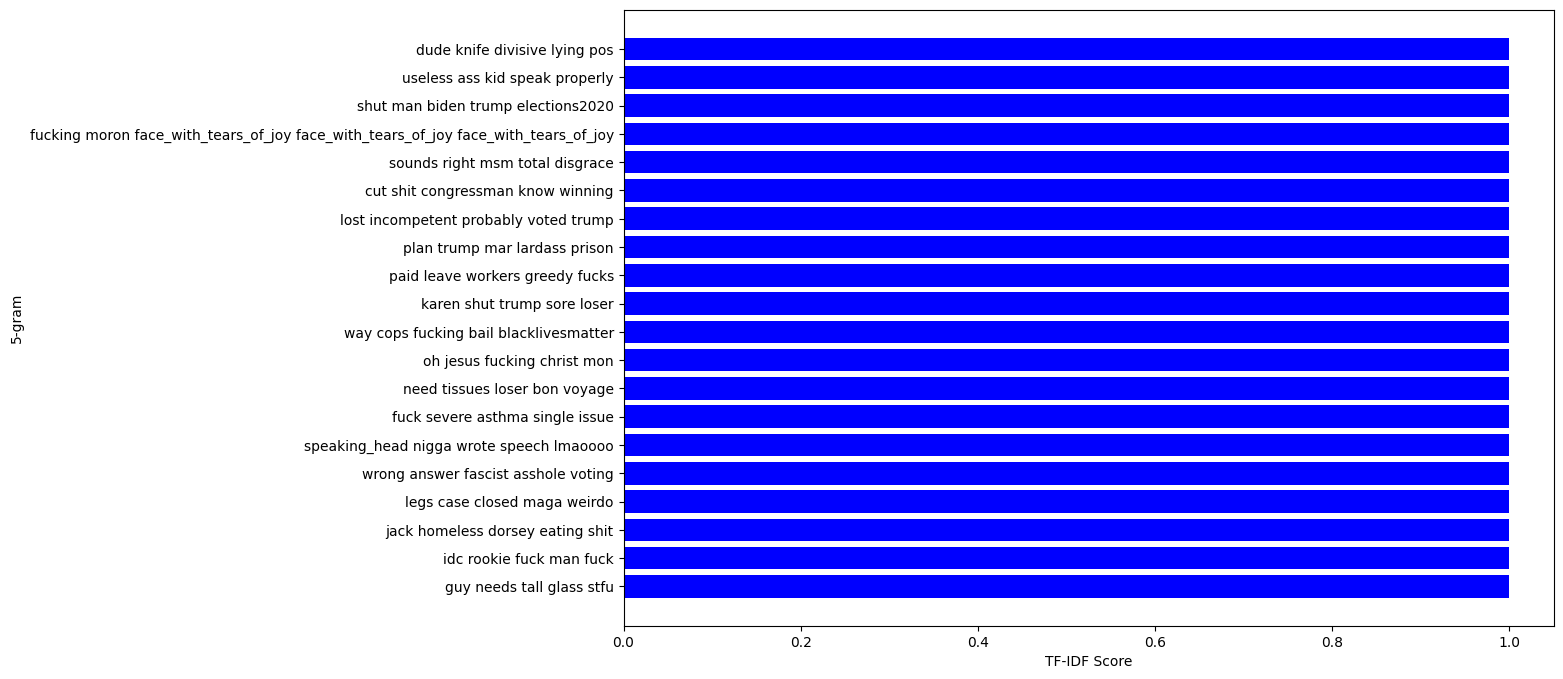

dude knife divisive lying pos: 1.0000
useless ass kid speak properly: 1.0000
shut man biden trump elections2020: 1.0000
fucking moron face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy: 1.0000
sounds right msm total disgrace: 1.0000
cut shit congressman know winning: 1.0000
lost incompetent probably voted trump: 1.0000
plan trump mar lardass prison: 1.0000
paid leave workers greedy fucks: 1.0000
karen shut trump sore loser: 1.0000
way cops fucking bail blacklivesmatter: 1.0000
oh jesus fucking christ mon: 1.0000
need tissues loser bon voyage: 1.0000
fuck severe asthma single issue: 1.0000
speaking_head nigga wrote speech lmaoooo: 1.0000
wrong answer fascist asshole voting: 1.0000
legs case closed maga weirdo: 1.0000
jack homeless dorsey eating shit: 1.0000
idc rookie fuck man fuck: 1.0000
guy needs tall glass stfu: 1.0000


In [ ]:
# Filter out instances where predicted label is 0 and true label is 1
filtered_df = correctly_classified_df[(correctly_classified_df['predicted_label'] == 1) & (correctly_classified_df['true_label'] == 1)]

# Initialise the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(5, 5))

# Fit and transform the filtered data
tfidf_matrix = vectorizer.fit_transform(filtered_df['cleaned_text'])

# Sum the TF-IDF scores for each trigram across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)
tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]

# Plotting the most significant trigrams
plt.figure(figsize=(12, 8))
words, scores = zip(*sorted_tfidf_scores)
plt.barh(words, scores, color="blue")
plt.xlabel('TF-IDF Score')
plt.ylabel('5-gram')
plt.gca().invert_yaxis()
plt.show()

# Print the most significant 5-grams and their scores
for word, score in sorted_tfidf_scores:
    print(f"{word}: {score:.4f}")

- The correctly classified 5-grams show aggression,such as "fucking moron", "shut man biden", and "useless ass kid". This directness contrasts with the misclassified 5-grams, which contain subtler, context-dependent offensive cues, like "people think germans worst tourist" or "holy shit did anonymous antifa".

- While the correctly classified 5-grams often have intense and universally recognised offensive words or slang, the misclassified ones tend to use a more distinctive vocabulary. This suggests that the model may be better to detect commonly used aggressive language but can miss out on less frequent offensive expressions.


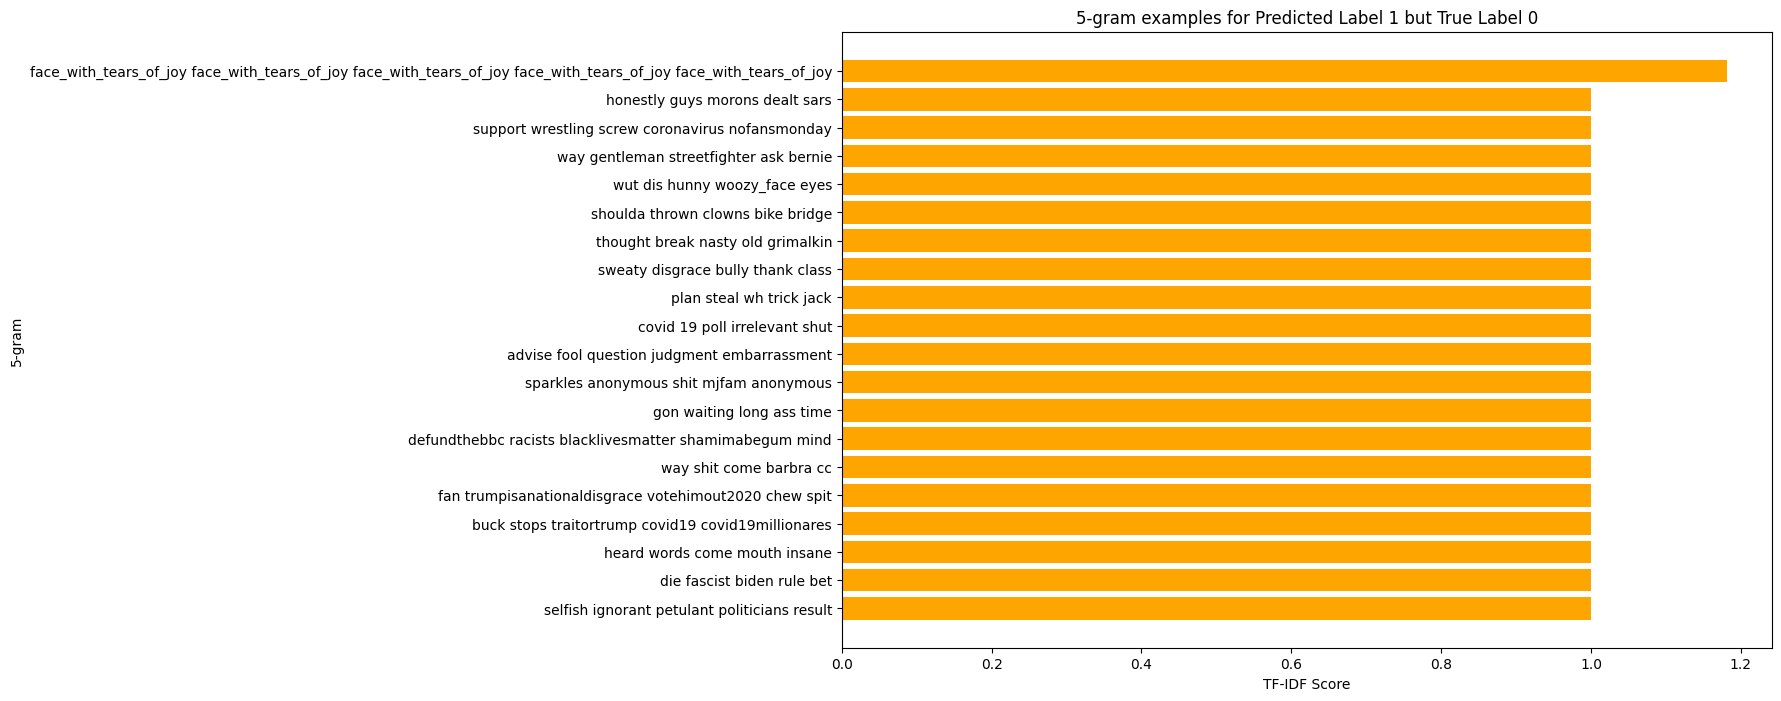

face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy: 1.1821
honestly guys morons dealt sars: 1.0000
support wrestling screw coronavirus nofansmonday: 1.0000
way gentleman streetfighter ask bernie: 1.0000
wut dis hunny woozy_face eyes: 1.0000
shoulda thrown clowns bike bridge: 1.0000
thought break nasty old grimalkin: 1.0000
sweaty disgrace bully thank class: 1.0000
plan steal wh trick jack: 1.0000
covid 19 poll irrelevant shut: 1.0000
advise fool question judgment embarrassment: 1.0000
sparkles anonymous shit mjfam anonymous: 1.0000
gon waiting long ass time: 1.0000
defundthebbc racists blacklivesmatter shamimabegum mind: 1.0000
way shit come barbra cc: 1.0000
fan trumpisanationaldisgrace votehimout2020 chew spit: 1.0000
buck stops traitortrump covid19 covid19millionares: 1.0000
heard words come mouth insane: 1.0000
die fascist biden rule bet: 1.0000
selfish ignorant petulant politicians result: 1.0000


In [ ]:
# Filter out instances where predicted label is 0 and true label is 1
filtered_df = incorrectly_classified_df[(incorrectly_classified_df['predicted_label'] == 1) & (incorrectly_classified_df['true_label'] == 0)]

# Initialise the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(5, 5))

# Fit and transform the filtered data
tfidf_matrix = vectorizer.fit_transform(filtered_df['cleaned_text'])

# Sum the TF-IDF scores for each trigram across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)
tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]

# Plotting the most significant trigrams
plt.figure(figsize=(12, 8))
words, scores = zip(*sorted_tfidf_scores)
plt.barh(words, scores, color="orange")
plt.xlabel('TF-IDF Score')
plt.ylabel('5-gram')
plt.title('5-gram examples for Predicted Label 1 but True Label 0')
plt.gca().invert_yaxis()
plt.show()

# Print the most significant 5-grams and their scores
for word, score in sorted_tfidf_scores:
    print(f"{word}: {score:.4f}")

In [ ]:
def contains_slang_or_curse(text):
    return profanity.contains_profanity(text)

# 1. All correctly classified instances
percentage_correct_all = (correctly_classified_df['cleaned_text'].apply(contains_slang_or_curse).sum() / len(correctly_classified_df)) * 100
print(f"\nPercentage of all correctly classified instances containing slang or curse words: {percentage_correct_all:.2f}%")

# 2. All incorrectly classified instances
percentage_incorrect = (incorrectly_classified_df['cleaned_text'].apply(contains_slang_or_curse).sum() / len(incorrectly_classified_df)) * 100
print(f"\nPercentage of all misclassified instances containing slang or curse words: {percentage_incorrect:.2f}%")

# 3. Instances where predicted label is 0 and true label is 1
filter_0_1 = (incorrectly_classified_df['predicted_label'] == 0) & (incorrectly_classified_df['true_label'] == 1)
percentage_0_1 = (incorrectly_classified_df[filter_0_1]['cleaned_text'].apply(contains_slang_or_curse).sum() / len(incorrectly_classified_df[filter_0_1])) * 100
print(f"Percentage of misclassified instances (predicted 0, true 1) containing slang or curse words: {percentage_0_1:.2f}%")

# 4. Instances where predicted label is 1 and true label is 0
filter_1_0 = (incorrectly_classified_df['predicted_label'] == 1) & (incorrectly_classified_df['true_label'] == 0)
percentage_1_0 = (incorrectly_classified_df[filter_1_0]['cleaned_text'].apply(contains_slang_or_curse).sum() / len(incorrectly_classified_df[filter_1_0])) * 100
print(f"\nPercentage of misclassified instances (predicted 1, true 0) containing slang or curse words: {percentage_1_0:.2f}%")

# 5. Correctly classified instances where true label is 1
filter_correct_1 = correctly_classified_df['true_label'] == 1
percentage_correct_1 = (correctly_classified_df[filter_correct_1]['cleaned_text'].apply(contains_slang_or_curse).sum() / len(correctly_classified_df[filter_correct_1])) * 100
print(f"\nPercentage of correctly classified instances (true label 1) containing slang or curse words: {percentage_correct_1:.2f}%")

# 6. Correctly classified instances where true label is 0
filter_correct_0 = correctly_classified_df['true_label'] == 0
percentage_correct_0 = (correctly_classified_df[filter_correct_0]['cleaned_text'].apply(contains_slang_or_curse).sum() / len(correctly_classified_df[filter_correct_0])) * 100
print(f"\nPercentage of correctly classified instances (true label 0) containing slang or curse words: {percentage_correct_0:.2f}%")


Percentage of all correctly classified instances containing slang or curse words: 26.00%

Percentage of all misclassified instances containing slang or curse words: 37.03%
Percentage of misclassified instances (predicted 0, true 1) containing slang or curse words: 32.81%

Percentage of misclassified instances (predicted 1, true 0) containing slang or curse words: 42.82%

Percentage of correctly classified instances (true label 1) containing slang or curse words: 65.89%

Percentage of correctly classified instances (true label 0) containing slang or curse words: 14.15%


In [ ]:
# Extracting samples where predicted label is 1 and true label is 0
sample_1_0 = incorrectly_classified_df[incorrectly_classified_df['predicted_label'] == 1][['cleaned_text', 'predicted_label', 'true_label']].sample(10)

In [ ]:
# Extracting samples where predicted label is 0 and true label is 1
sample_0_1 = incorrectly_classified_df[incorrectly_classified_df['predicted_label'] == 0][['cleaned_text', 'predicted_label', 'true_label']].sample(10)

In [ ]:
sample_1_0

,cleaned_text,predicted_label,true_label
1858,"""per olivia troye former homeland security adv...",1,0
1713,"the aids joke was horrible, this is why the st...",1,0
99,end their inept response maybe ! giving up try...,1,0
1554,when i said i could not breathe when my father...,1,0
612,trump is not a leader nor a president. he is a...,1,0
1524,the word is getting out regardless of the wort...,1,0
381,minneapolis city council president defends pla...,1,0
1356,abi you are mad covid money shey you dy wyne me,1,0
998,>anonymous patch 2008 was 12 years ago you cri...,1,0
1957,"thousands of things, but the most important is...",1,0


In [ ]:
sample_0_1

,cleaned_text,predicted_label,true_label
1185,democrat/communist/blm party are panicking! th...,0,1
1260,i do not know why do the weatherman keep on te...,0,1
928,more fake news as always. the evil left mess i...,0,1
187,she looks mixed race. so black are protesting ...,0,1
1804,"nevertrump cadaver: ""wear a fkg mask, trumptar...",0,1
1254,imbecile is one of my favorite words. :grinnin...,0,1
1451,so is jizz so i guess i commit a mass murder e...,0,1
1950,since 45 want american like russia and n korea...,0,1
1541,another lie from this lying administration!,0,1
111,it does not matter what skin color you are any...,0,1
